### Importing the necessary modules for the project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import or read the dataset into your notebook. 

In [4]:
data = pd.read_csv("Churn_Modelling.csv")

In [5]:
#The below code helps to visualize the first five rows of our dataset

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data["Geography"].unique() 

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
#This gives us some basic information about our dataset with regards to each feature

In [9]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
#The .shape command gives the number of rows and columns 

In [12]:
data.shape

(10000, 14)

In [13]:
#The below code gives us the number of rows contained in each feature and their respective data type

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#Analyzing the dataset, its obvious that some features will not be necessary in developing our model hence, these features are dropped by the code below

In [15]:
data.drop(["RowNumber", "CustomerId", "Surname"], axis = 1, inplace = True)

In [16]:
#The line of code below gives the first ten rows of our dataset after dropping the undesired features

In [17]:
data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [18]:
#Here, we give a count to the occurences of the unique values in our target variable
#We realize that our dataset target variable is quite unbalanced as this will make our algorithm bias

In [19]:
data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [20]:
#The code line below just defines our variables and classifies them , putting each class in a list except the target varaible

In [21]:
categorical_features = ["Geography", "Gender", "HasCrCard", "IsActiveMember"]
Numerical_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
target = "Exited"

In [22]:
#Since our Ml model cannot work on categorical variables, we use the get_dummies function to convert the unique values in the column we are working on to numerical variables 

In [23]:
Geography = pd.get_dummies(data.Geography).iloc[:, 1:]
Geography.head(10)

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
5,0,1
6,0,0
7,1,0
8,0,0
9,0,0


In [24]:
#This also does the same thing as the previous line of code but on a different feature

In [25]:
Gender = pd.get_dummies(data.Gender).iloc[:, :]
Gender.head(10)

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,0,1
6,0,1
7,1,0
8,0,1
9,0,1


In [27]:
#This line of code just merges or concatenate our original dataset to the gender and geography datset we just created
#Then showing the first ten rows

In [33]:
dataset = pd.concat([data, Geography, Gender], axis = 1)
dataset.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Female,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,1,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,0,1,0,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,0,0,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,0,1,0
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,0,0,1
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,0,0,1


In [34]:
#here, we drop the gender and geography dataset since we have already represented them in a numerical form

In [35]:
dataset.drop(["Geography", "Gender"], axis = 1, inplace = True)

In [ ]:
dataset.head(10)

In [76]:
X = dataset.drop(["Exited"], axis = 1)
y = dataset["Exited"]

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
classifier = RandomForestClassifier(n_estimators = 200, random_state = 0 )

In [80]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [81]:
predictions = classifier.predict(X_test)

In [82]:
from sklearn.metrics import classification_report, accuracy_score

In [83]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.89      0.96      0.92      1595
          1       0.77      0.52      0.62       405

avg / total       0.86      0.87      0.86      2000



In [84]:
print(accuracy_score(y_test, predictions))

0.8705


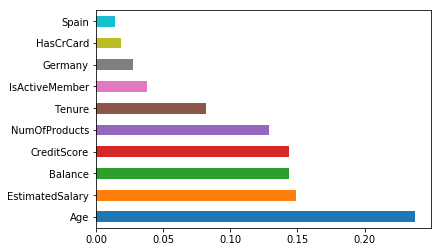

In [86]:
#This shows with a barchart the order of importance of the features in relation to the target variable
feat_importances = pd.Series(classifier.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(kind = "barh")

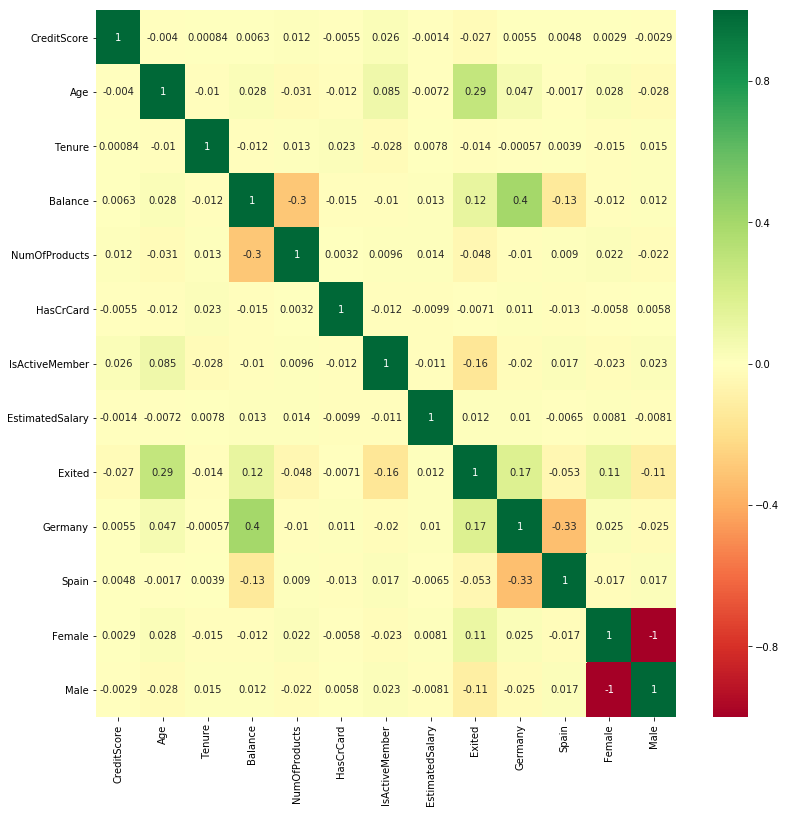

In [92]:
#This heatmap shows the correlation between the features and the target variable

corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(13,13))

#Plotting heatmap
g = sns.heatmap(dataset[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000002380C21CF8>,
      dtype=object)

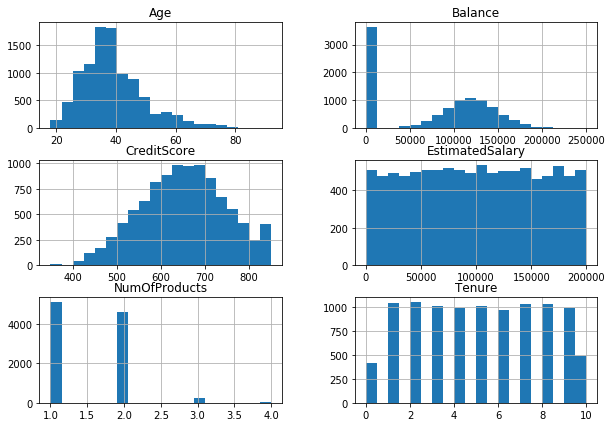

In [21]:
data[Numerical_features].hist(bins = 20, figsize = (10,7))

Text(0.5,1,'churned')

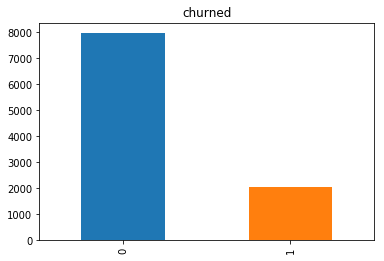

In [9]:
data[target].value_counts().plot("bar").set_title("churned")

In [10]:
data["Age"].value_counts().head()

37    478
38    477
35    474
36    456
34    447
Name: Age, dtype: int64

In [11]:
data[Numerical_features].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [13]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
data.shape

(10000, 11)

In [15]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


[]

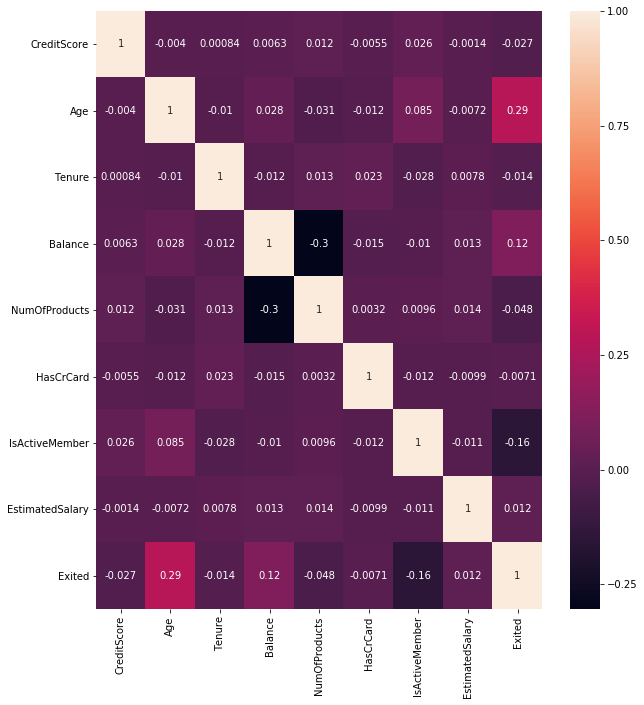

In [16]:
plt.figure(figsize=(10,11))
sns.heatmap(data.corr(), annot=True)
plt.plot()

In [21]:
data[Numerical_features].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [22]:
data[categorical_features].describe()

,HasCrCard,IsActiveMember
count,10000.00000,10000.000000
mean,0.70550,0.515100
std,0.45584,0.499797
min,0.00000,0.000000
25%,0.00000,0.000000
50%,1.00000,1.000000
75%,1.00000,1.000000
max,1.00000,1.000000


Text(0.5,1,'churned')

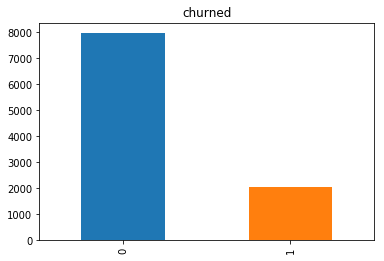

In [23]:
data[target].value_counts().plot("bar").set_title("churned")

In [ ]:
feature = "Geography"
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
data[data.churn = "No"]